<a href="https://colab.research.google.com/github/tjddyd2259/caba_nlp/blob/main/DL22_predictiong_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data() 

57344/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
train_data[:5]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

데이터 준비
상이한 스케일을 가진 값을 신경망에 주입하면 문제가 된다.
특성별로 정규화한다. 입력 데이터에 있는 각 특성에 대해서 특성의 평균을 빼고 표준편차로 나눈다. 

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
train_data[:5]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.0056343 , -0.48361547,  1.0283258 , -0.25683275,  1.32861221,
         0.15364225,  0.69480801, -0.57857203,  1.67588577,  1.5652875 ,
         0.78447637,  0.3898823 ,  0.26349695]])

In [ ]:
print(train_data.mean())
print(train_data.std())

-3.652828230297545e-17
0.9999999999999994


In [5]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop',loss='mse',metrics=['mean_absolute_error'])
  return model

In [7]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = [] 
for i in range(k):
  print('처리중인 폴드 #', i)
  # 검증 데이터 준비: k번째 분할
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i *num_val_samples:(i+1)*num_val_samples]

  # 훈련 데이터 준비: 다른 분할 전체
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1)*num_val_samples:]],axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],axis=0
  )

  # 케라스 모델 구성 (컴파일 포함)
  model = build_model()
  # 모델 훈련 (verbose=0 이므로 훈련 과정이 출력되지 않습니다)
  model.fit(partial_train_data,partial_train_targets,
            epochs=num_epochs,batch_size=1,verbose=0)
  val_mse,val_mae = model.evaluate(val_data, val_targets,verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [8]:
all_scores

[2.152230978012085, 2.691237688064575, 2.482041120529175, 2.471477746963501]

In [9]:
np.mean(all_scores)

2.449246883392334

In [10]:
from keras import backend as K
K.clear_session()

In [11]:
num_epochs=500
all_mae_histories = []
for i in range(k):
  print('처리중인 폴드 #',i)
  # 검증 데이터 준비 : k번째 분할
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]

  # 훈련 데이터 준비: 다른 분할 전체
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1)*num_val_samples:]],axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)*num_val_samples:]],axis=0
  )

  # 케라스 모델 구성(컴파일 포함)
  model = build_model()
  # 모델 훈련
  history = model.fit(partial_train_data,partial_train_targets,
                      validation_data=(val_data,val_targets),
                      epochs=num_epochs,batch_size=1,verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [12]:
average_mae_history = [np.mean([x[i]for x in all_mae_histories])for i in range(num_epochs)]

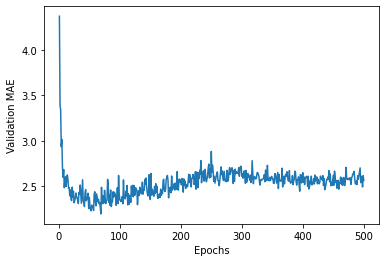

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

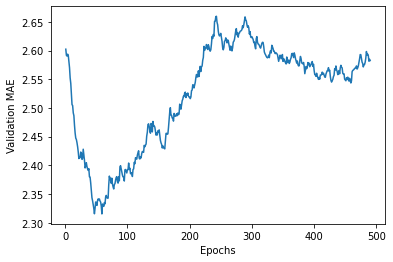

In [16]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point *(1-factor))
    else :
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [17]:
model = build_model()
model.fit(train_data,train_targets,
          epochs=80,batch_size=16,verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data,test_targets)

Epoch 1/80
26/26 [==============================] - 1s 1ms/step - loss: 520.9136 - mean_absolute_error: 20.8210
Epoch 2/80
26/26 [==============================] - 0s 1ms/step - loss: 309.7888 - mean_absolute_error: 15.5579
Epoch 3/80
26/26 [==============================] - 0s 2ms/step - loss: 147.6628 - mean_absolute_error: 9.6934
Epoch 4/80
26/26 [==============================] - 0s 1ms/step - loss: 55.7158 - mean_absolute_error: 5.5969
Epoch 5/80
26/26 [==============================] - 0s 1ms/step - loss: 32.6723 - mean_absolute_error: 4.0329
Epoch 6/80
26/26 [==============================] - 0s 1ms/step - loss: 31.1847 - mean_absolute_error: 3.9132
Epoch 7/80
26/26 [==============================] - 0s 1ms/step - loss: 23.8233 - mean_absolute_error: 3.1494
Epoch 8/80
26/26 [==============================] - 0s 1ms/step - loss: 20.3773 - mean_absolute_error: 3.0071
Epoch 9/80
26/26 [==============================] - 0s 1ms/step - loss: 19.5086 - mean_absolute_error: 2.9430
Epoch

In [18]:
test_mae_score

2.703684091567993